#pytorch computer vision

##0. computer vision libraries in pytorch
pytorch is good for comuter vision:

`torchvision.datasets` - get datasets and data loading functions for computer vision

`torchvision.models` - get pretrained computer vision models that you can laverage for your own prob

`torchvision.transforms` -functions for manipulating vision data/images to be suitable for use with ML model.

`torch.utils.data.Dataset` - base dataset class for pytorch.

`torch.utils.data.Dataloader` - creates a python iterable over a dataset.

In [1]:
import torch
from torch import nn

#import torchvision
import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor

import matplotlib as plt

print(torch.__version__)
print(torchvision.__version__)

2.6.0+cu124
0.21.0+cu124


##1. Getting a dataset

fashion MNIST

In [2]:
#setup training data
from torchvision import datasets
train_data = datasets.FashionMNIST(
    root = "data", #where to download data to?
    train = True, #do we need train data?
    download = True, #do we want to download?
    transform= torchvision.transforms.ToTensor(), #how we want to transform data?
    target_transform= None #how we want to transform label?
)

test_data = datasets.FashionMNIST(
    root = "data",
    train = False,
    download = True,
    transform= ToTensor(),
    target_transform= None
)

100%|██████████| 26.4M/26.4M [00:01<00:00, 19.7MB/s]
100%|██████████| 29.5k/29.5k [00:00<00:00, 303kB/s]
100%|██████████| 4.42M/4.42M [00:00<00:00, 5.52MB/s]
100%|██████████| 5.15k/5.15k [00:00<00:00, 12.0MB/s]


In [3]:
len(train_data), len(test_data)

(60000, 10000)

In [4]:
#first training example
image, label = train_data[0]
#image, label

In [5]:
class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [6]:
class_to_idx = train_data.class_to_idx
class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [7]:
image.shape, label

(torch.Size([1, 28, 28]), 9)

In [8]:
train_data.targets

tensor([9, 0, 0,  ..., 3, 0, 5])

In [9]:
#check the shape of our image
print(f"image shape: {image.shape} -> [color_channels, height, width]")
print(f"image label: {label}")

image shape: torch.Size([1, 28, 28]) -> [color_channels, height, width]
image label: 9


#1.2 visualizing our data

shape of image: torch.Size([1, 28, 28])


Text(0.5, 1.0, '9')

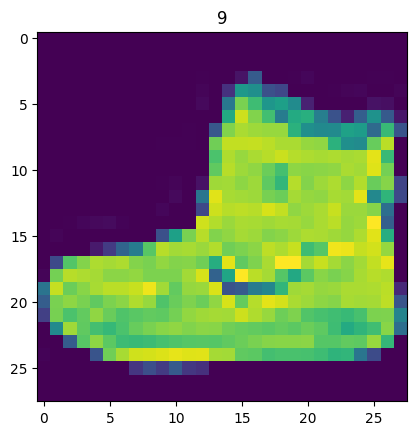

In [10]:
import matplotlib.pyplot as plt
image, label = train_data[0]
print(f"shape of image: {image.shape}")
plt.imshow(image.squeeze())
plt.title(label)

(np.float64(-0.5), np.float64(27.5), np.float64(27.5), np.float64(-0.5))

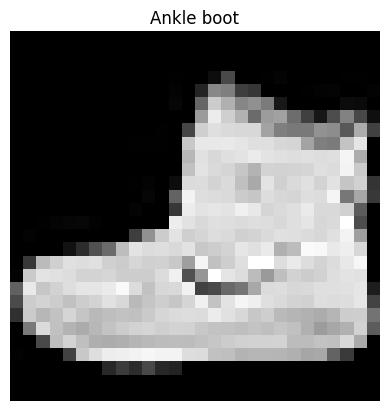

In [11]:
plt.imshow(image.squeeze(), cmap="grey")
plt.title(class_names[label])
plt.axis(False)

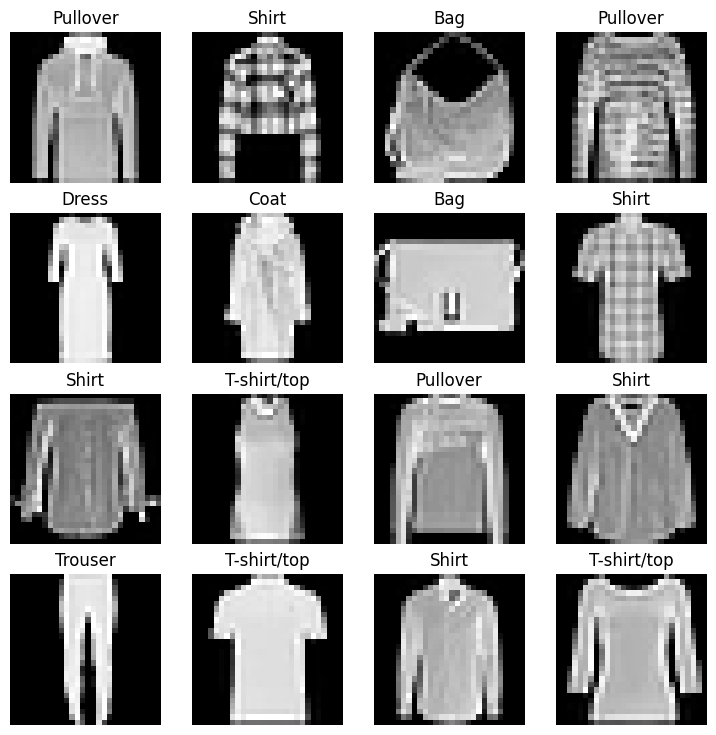

In [12]:
#plot more images
#torch.manual_seed(42)
fig = plt.figure(figsize=(9,9))
rows, cols = 4, 4
for i in range(1, rows*cols+1):
  random_idx = torch.randint(0, len(train_data), size=[1]).item()
  img, label = train_data[random_idx]
  fig.add_subplot(rows, cols, i)
  plt.imshow(img.squeeze(), cmap="gray")
  plt.title(class_names[label])
  plt.axis(False)

[link text](https://)##2. prepare DataLoader
do you think these items of clothing (images) could be moduled with linear lines or non linear?


dataloader turns our dataset into a python iterable.
means we want to turn our data into batches (or mini batches).

why?
1. more computationally efficient, as computing hardware may not be able to look (store in memory) at 60000 in one hit. so we break it down into 32 imgs at a time (batch size of 32).
2. gives nn more chances to update its gradient per epoch.

(mini batches)


In [13]:
train_data, test_data

(Dataset FashionMNIST
     Number of datapoints: 60000
     Root location: data
     Split: Train
     StandardTransform
 Transform: ToTensor(),
 Dataset FashionMNIST
     Number of datapoints: 10000
     Root location: data
     Split: Test
     StandardTransform
 Transform: ToTensor())

In [14]:
from torch.utils.data import DataLoader
BATCH_SIZE = 32
train_dataloader = DataLoader(dataset=train_data,
                              batch_size=BATCH_SIZE,
                              shuffle=True)
test_dataloader = DataLoader(dataset=test_data,
                              batch_size=BATCH_SIZE,
                              shuffle=True)
train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7f6c090867d0>,
 <torch.utils.data.dataloader.DataLoader at 0x7f6c0b515a50>)

In [15]:
#lets check out what we have created
print(f"dataloader: {train_dataloader, test_dataloader}")
print(f"length of train_dataloader: {len(train_dataloader)} batches of {BATCH_SIZE}")
print(f"length of test_dataloader: {len(test_dataloader)} batches of {BATCH_SIZE}")

dataloader: (<torch.utils.data.dataloader.DataLoader object at 0x7f6c090867d0>, <torch.utils.data.dataloader.DataLoader object at 0x7f6c0b515a50>)
length of train_dataloader: 1875 batches of 32
length of test_dataloader: 313 batches of 32


In [16]:
#check out what is inside the training dataloader
train_features_batch, train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape, train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

image size: torch.Size([1, 28, 28])
label: 2, label size: torch.Size([])


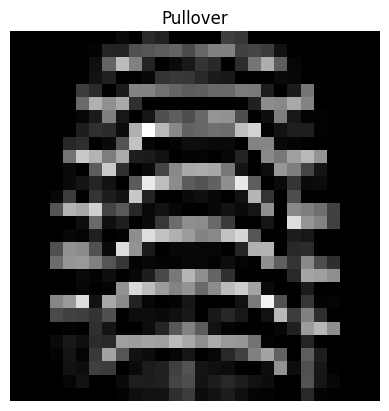

In [17]:
#show a sample
#torch.manual_seed(42)
random_idx = torch.randint(0, len(train_features_batch), size=[1]).item()
img, label = train_features_batch[random_idx], train_labels_batch[random_idx]
plt.imshow(img.squeeze(), cmap="gray")
plt.title(class_names[label])
plt.axis(False)
print(f"image size: {img.shape}")
print(f"label: {label}, label size: {label.shape}")

##3. model 0: build a baseline model

when starting to build a series of machine learning modeling experiments it is best prctice to start with a baseline model.

a baseline model is a simple model you will try and improve upon with subsequent models/experiments.

start simple and add complexity when necessary.

In [18]:
#create flatten layer
flatten_model = nn.Flatten()

#get a single sample
x = train_features_batch[0]

#flatten the sample
output = flatten_model(x)

#print out what happened
print(f"shape before flatten: {x.shape} -> [color channels, height, width]")
print(f"shape after flattening: {output.shape} -> [color channels, height*width]")

shape before flatten: torch.Size([1, 28, 28]) -> [color channels, height, width]
shape after flattening: torch.Size([1, 784]) -> [color channels, height*width]


In [19]:
output

tensor([[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0

In [20]:
x

tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,

In [21]:
from torch import nn
class FashionMNISTModelV0(nn.Module):
  def __init__(self,
               input_shape: int,
               hidden_units: int,
               output_shape: int
               ):
    super().__init__()
    self.layer_stack = nn.Sequential(
        nn.Flatten(),
        nn.Linear(
            in_features=input_shape,
            out_features=hidden_units
        ),
        nn.Linear(
            in_features=hidden_units,
            out_features= output_shape
        )
    )

  def forward(self, x):
    return self.layer_stack(x)

In [22]:
torch.manual_seed(42)

#setup model with input parameters
model_0 = FashionMNISTModelV0(
    input_shape=28*28, #28*28
    hidden_units=10,
    output_shape=len(class_names)
)
model_0.to("cpu")

FashionMNISTModelV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [23]:
dummy_x = torch.rand([1, 1, 28, 28])
model_0(dummy_x).shape

torch.Size([1, 10])

In [24]:
model_0.state_dict()

OrderedDict([('layer_stack.1.weight',
              tensor([[ 0.0273,  0.0296, -0.0084,  ..., -0.0142,  0.0093,  0.0135],
                      [-0.0188, -0.0354,  0.0187,  ..., -0.0106, -0.0001,  0.0115],
                      [-0.0008,  0.0017,  0.0045,  ..., -0.0127, -0.0188,  0.0059],
                      ...,
                      [-0.0116,  0.0273, -0.0344,  ...,  0.0176,  0.0283, -0.0011],
                      [-0.0230,  0.0257,  0.0291,  ..., -0.0187, -0.0087,  0.0001],
                      [ 0.0176, -0.0147,  0.0053,  ..., -0.0336, -0.0221,  0.0205]])),
             ('layer_stack.1.bias',
              tensor([-0.0093,  0.0283, -0.0033,  0.0255,  0.0017,  0.0037, -0.0302, -0.0123,
                       0.0018,  0.0163])),
             ('layer_stack.2.weight',
              tensor([[ 0.0614, -0.0687,  0.0021,  0.2718,  0.2109,  0.1079, -0.2279, -0.1063,
                        0.2019,  0.2847],
                      [-0.1495,  0.1344, -0.0740,  0.2006, -0.0475, -0.2514, -0.

###3.1 setup loss, optimizer and evaluation metrics

* loss function - `nn.CrossEntropyLoss()` - multi class data
* optimizer - `torch.optim.SGD`
* Evaluation metrices -> classification problem -> accuracy

In [25]:
def acc_fn(y_true, y_pred):
  correct = torch.eq(y_true,y_pred).sum().item()
  return correct/ len(y_true) * 100

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.1)

##3.2 creating a function to time our experiments

machine learning is very experimental.

two of the main things you want to keep track of:
1. Model performance (loss and accuracy values etc)
2. How fast it runs

In [26]:
from timeit import default_timer as timer
def print_train_time(start: float,
                     end: float,
                     device: torch.device = None):
  total_time = end - start
  print(f"Train time on {device}: {total_time:.3f} seconds")
  return total_time

In [27]:
start_time = timer()
#code...
end_time = timer()
print_train_time(start_time, end_time, device="cpu")

Train time on cpu: 0.000 seconds


5.070899999282119e-05

##3.3 creating a training loop and training a model om batches of data
1. loop through epochs.
2. loop through training batches, perform training steps, calculate the train loss *per batch*.
3. loop through testing batches, perform testing steps, calculate the test loss *per batch*.
4. print out what is happening.
5. Time it all. (for fun)

In [28]:
#import tqdm to show us how many epochs our model gone through (progress bar)
from tqdm.auto import tqdm

#set the seed and start the timer
torch.manual_seed(42)
train_time_start_on_cpu = timer()

#set the number of epoches (we will keep this small for faster training time)
epochs = 5

#create training and testing loop
for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}\n-----")

  ###training
  train_loss = 0

  #add a loop to loop through the training batches
  for batch, (X, y) in enumerate(train_dataloader):
    model_0.train()

    #1. forward pass
    y_pred = model_0(X)

    #2. calculate loss per batch
    loss = loss_fn(y_pred, y)
    train_loss += loss #accumalate train loss

    #3. optimizer zero grad
    optimizer.zero_grad()

    #4. loss backward
    loss.backward()

    #5.optimizer step
    optimizer.step()

    #print what is happening
    if batch % 400 == 0:
      print(f"Looked at: {batch * len(X)}/{len(train_dataloader.dataset)} samples.")

  # devides total train loss by length if train dataloader
  train_loss /= len(train_dataloader)

  ### Testing
  test_loss, test_acc = 0, 0
  model_0.eval()
  with torch.inference_mode():
    for X_test, y_test in test_dataloader:
      #1. forward pass
      test_pred = model_0(X_test)

      #2. calculate loss( accumalatively)
      test_loss += loss_fn(test_pred, y_test)

      #3. calculate accc
      test_acc += acc_fn(y_true=y_test, y_pred=test_pred.argmax(dim=1))

    #calculate test loss average per batch
    test_loss /= len(test_dataloader)

    #calculate the test acc average per batch
    test_acc /= len(test_dataloader)


  #print out what is happening
  print(f"\n Train loss: {train_loss:.4f} | Test loss: {test_loss:.4f} | test acc: {test_acc:.4f}")


#calculate training time
train_time_end_on_cpu = timer()
total_train_time_model_0 = print_train_time(start= train_time_start_on_cpu,
                                            end=train_time_end_on_cpu,
                                            device = str(next(model_0.parameters()).device))

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 0
-----
Looked at: 0/60000 samples.
Looked at: 12800/60000 samples.
Looked at: 25600/60000 samples.
Looked at: 38400/60000 samples.
Looked at: 51200/60000 samples.

 Train loss: 0.5904 | Test loss: 0.5102 | test acc: 82.0387
Epoch: 1
-----
Looked at: 0/60000 samples.
Looked at: 12800/60000 samples.
Looked at: 25600/60000 samples.
Looked at: 38400/60000 samples.
Looked at: 51200/60000 samples.

 Train loss: 0.4743 | Test loss: 0.5268 | test acc: 81.6793
Epoch: 2
-----
Looked at: 0/60000 samples.
Looked at: 12800/60000 samples.
Looked at: 25600/60000 samples.
Looked at: 38400/60000 samples.
Looked at: 51200/60000 samples.

 Train loss: 0.4537 | Test loss: 0.5126 | test acc: 82.9972
Epoch: 3
-----
Looked at: 0/60000 samples.
Looked at: 12800/60000 samples.
Looked at: 25600/60000 samples.
Looked at: 38400/60000 samples.
Looked at: 51200/60000 samples.

 Train loss: 0.4433 | Test loss: 0.4736 | test acc: 83.2468
Epoch: 4
-----
Looked at: 0/60000 samples.
Looked at: 12800/60000 sample

In [29]:
str(next(model_0.parameters()).device)

'cpu'

##4. make predictions and get model 0 results

In [30]:
torch.manual_seed(42)
def eval_model(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               acc_fn):
  loss, acc = 0, 0
  model.eval()
  with torch.inference_mode():
    for X, y in tqdm(data_loader): #diff with training and testing that there is no epochs
      #make predictions
      y_pred = model(X)

      #accumalate the loss and acc values per batch
      loss += loss_fn(y_pred, y)
      acc += acc_fn(y_true=y,
                    y_pred=y_pred.argmax(dim=1))

    #scale loss and acc to find avg loss/acc per batch
    loss /= len(data_loader)
    acc /= len(data_loader)

  return{"model_name": model.__class__.__name__,
         "model_loss": loss.item(),
         "model_acc": acc}

In [31]:
#calculate model 0 results
model_0_results = eval_model(model=model_0,
                             data_loader= test_dataloader,
                             loss_fn=loss_fn,
                             acc_fn= acc_fn)

model_0_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.46732279658317566,
 'model_acc': 83.55630990415335}

##5. setup device agnostic code(for using GPU if there is one)

In [32]:
#non-linear on gpu, linear on cpu
!nvidia-smi

/bin/bash: line 1: nvidia-smi: command not found


In [33]:
torch.cuda.is_available()

False

In [34]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cpu'

##6. Model 1: building a better model with non-linearity


In [35]:
#create a model with non linear and linear layers
class FashionMNISTModelV1(nn.Module):
  def __init__(self,
               input_shape: int,
               hidden_units: int,
               output_shape: int):
    super().__init__()
    self.layer_stack = nn.Sequential(nn.Flatten(),
                                     nn.Linear(in_features=input_shape,
                                               out_features= hidden_units),
                                     nn.ReLU(),
                                     nn.Linear(in_features=hidden_units,
                                               out_features=output_shape),
                                     nn.ReLU()
                                     )
  def forward(self, x):
    return self.layer_stack(x)

In [36]:
#create instance of model 1
torch.manual_seed(42)
model_1 = FashionMNISTModelV1(input_shape=784, # this is output of flatten after 28*28
                              hidden_units=10,
                              output_shape=len(class_names)).to(device)
next(model_1.parameters()).device

device(type='cpu')

##setup loss , optimizer , and evaluation metrices

In [37]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params= model_1.parameters(),
                            lr= 0.1)

##6.1 functionizing training and evaluation/testing loop

In [38]:
def train_step(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               acc_fn,
               device: torch.device = device):

  train_loss, train_acc = 0, 0

  #put model on training mode
  model.train()

  #training loop per batch
  for batch, (X, y) in enumerate(data_loader):
    #put data on target device
    X, y = X.to(device), y.to(device)

    #forward pass
    y_pred = model(X)

    #calculate the loss
    loss = loss_fn(y_pred, y) #.argmax(dim=1) not needed cuz loss take logits
    acc = acc_fn(y_true=y, y_pred=y_pred.argmax(dim=1))  #.argmax(dim=1) needed cuz acc take labels (index of highest index)

    train_loss += loss
    train_acc += acc

    #optimizer zero grad
    optimizer.zero_grad()

    #backpropagation
    loss.backward()

    #opimizer step
    optimizer.step()

  #calculate avg loss and acc
  train_loss /= len(data_loader)
  train_acc /= len(data_loader)

  #print what is happening
  print(f"train loss: {train_loss:.5f} | train acc: {train_acc:.2f}%")

In [39]:
def test_step(model: torch.nn.Module,
              data_loader: torch.utils.data.dataloader,
              loss_fn: torch.nn.Module,
              acc_fn,
              device: torch.device = device
              ):
  test_loss, test_acc = 0, 0

  #put model on eval mode
  model.eval()

  #turn on inference mode context manager
  with torch.inference_mode():
    for batch, (X, y) in enumerate(data_loader):

      X, y = X.to(device), y.to(device)
      test_pred = model(X)

      test_loss += loss_fn(test_pred, y)
      test_acc += acc_fn(y_true= y,
                   y_pred = test_pred.argmax(dim = 1))

    #adjuct metrices and print out
    test_loss /= len(data_loader)
    test_acc /= len(data_loader)

    print(f"Test loss: {test_loss:.5f} | Test acc: {test_acc:.2f}%")

In [40]:
torch.manual_seed(42)
start_train_time_on_gpu = timer()
epochs = 5

for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}\n----------")

  #optimization and evaluation loop
  train_step(model=model_1,
             data_loader=train_dataloader,
             loss_fn=loss_fn,
             optimizer=optimizer,
             acc_fn=acc_fn,
             device=device)
  test_step(model=model_1,
            data_loader=test_dataloader,
            loss_fn=loss_fn,
            acc_fn=acc_fn,
            device=device)

end_train_time_on_gpu = timer()
total_train_time_model_1 = print_train_time(start=start_train_time_on_gpu,
                 end=end_train_time_on_gpu,
                 device='gpu')

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 0
----------
train loss: 1.09199 | train acc: 61.34%
Test loss: 0.95690 | Test acc: 64.98%
Epoch: 1
----------
train loss: 0.73779 | train acc: 73.69%
Test loss: 0.72388 | Test acc: 74.21%
Epoch: 2
----------
train loss: 0.66776 | train acc: 76.08%
Test loss: 0.68751 | Test acc: 75.64%
Epoch: 3
----------
train loss: 0.64469 | train acc: 76.58%
Test loss: 0.65771 | Test acc: 75.63%
Epoch: 4
----------
train loss: 0.62659 | train acc: 77.07%
Test loss: 0.65508 | Test acc: 76.30%
Train time on gpu: 54.526 seconds


> **note:** sometimes, depending on data/hardware you might find your model train faster on cpu than gpu.
>
>why is this?
>1. it could be that the overhead for copying data/model to and from the GPU outweights the compute benefits offered by GPU.
>2. the hardware you are using has a better CPU in terms of compute capability than the GPU.

In [41]:
 model_0_results

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.46732279658317566,
 'model_acc': 83.55630990415335}

In [42]:
total_train_time_model_0

54.631962281

In [43]:
torch.manual_seed(42)
def eval_model(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               acc_fn):
  loss, acc = 0, 0
  model.eval()
  with torch.inference_mode():
    for X, y in tqdm(data_loader): #diff with training and testing that there is no epochs
      X, y = X.to(device), y.to(device)
      #make predictions
      y_pred = model(X)

      #accumalate the loss and acc values per batch
      loss += loss_fn(y_pred, y)
      acc += acc_fn(y_true=y,
                    y_pred=y_pred.argmax(dim=1))

    #scale loss and acc to find avg loss/acc per batch
    loss /= len(data_loader)
    acc /= len(data_loader)

  return{"model_name": model.__class__.__name__,
         "model_loss": loss.item(),
         "model_acc": acc}

In [44]:
# Get model 1 results dictionary
model_1_results = eval_model(model=model_1,
                             data_loader=test_dataloader,
                             loss_fn=loss_fn,
                             acc_fn=acc_fn)

model_1_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV1',
 'model_loss': 0.6555879712104797,
 'model_acc': 76.27795527156549}

In [45]:
model_0_results

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.46732279658317566,
 'model_acc': 83.55630990415335}

##Model 2: Building a convolutional Neural Networks

CNN also know ConvNets.
find patterns in visual data.
> https://poloclub.github.io/cnn-explainer/?norec=true


In [46]:
class FashionMNISTModelV2(nn.Module):
  def __init__(self,
               input_shape: int,
               hidden_units,
               output_shape):
    super().__init__()
    self.convo_block_1 = nn.Sequential(
        nn.Conv2d(in_channels= input_shape,
                  out_channels = hidden_units,
                  kernel_size=3, #how big is the square that is going around the image
                  stride=1,   #take a step one pixel at a time
                  padding=1), #add extra pixel around image
        nn.ReLU(),
        nn.Conv2d(in_channels= hidden_units,
                  out_channels = hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2,
                     stride=2)
    )
    self.convo_block_2 = nn.Sequential(
        nn.Conv2d(in_channels= hidden_units,
                  out_channels = hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels= hidden_units,
                  out_channels = hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)
        )
    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=hidden_units*7*7, #there is a thrick to calculate this
                  out_features=output_shape)
    )

  def forward(self, x):
    x = self.convo_block_1(x)
    #print(f"output shape with conv_block_1: {x.shape}")
    x = self.convo_block_2(x)
    #print(f"output shape of conv_block_2: {x.shape}")
    x = self.classifier(x)
    #print(f"output shape of classifier: {x.shape}")
    return x

In [47]:
#create instance of cnn model
torch.manual_seed(42)

model_2 = FashionMNISTModelV2(input_shape=1,
                              hidden_units=10,
                              output_shape=len(class_names)).to(device)


torch.Size([1, 28, 28])


(np.float64(-0.5), np.float64(27.5), np.float64(27.5), np.float64(-0.5))

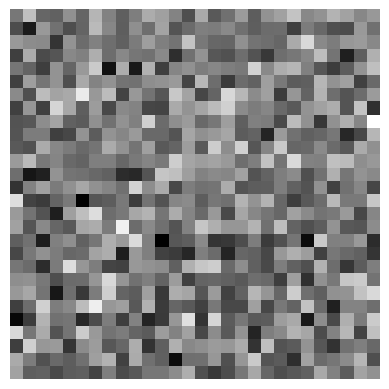

In [48]:
rand_image_tensor = torch.randn(size=(1,28,28))
plt.imshow(rand_image_tensor.squeeze(), cmap="gray")
print(rand_image_tensor.shape)
plt.axis(False)

In [49]:
#pass image through model
model_2(rand_image_tensor.unsqueeze(dim=0)).to(device)

tensor([[ 0.0366, -0.0940,  0.0686, -0.0485,  0.0068,  0.0290,  0.0132,  0.0084,
         -0.0030, -0.0185]], grad_fn=<AddmmBackward0>)

##7.1 stepping through `nn.conv2d`
> https://pytorch.org/docs/stable/generated/torch.nn.Conv2d.html

In [50]:
torch.manual_seed(42)

#create a batch of images
images = torch.randn(size=(32,3,64,64))
test_image = images[0]

print(f"image batch shape: {images.shape}")
print(f"single image shape: {test_image.shape}")
print(f"test image: {test_image}")

image batch shape: torch.Size([32, 3, 64, 64])
single image shape: torch.Size([3, 64, 64])
test image: tensor([[[ 1.9269,  1.4873,  0.9007,  ...,  1.8446, -1.1845,  1.3835],
         [ 1.4451,  0.8564,  2.2181,  ...,  0.3399,  0.7200,  0.4114],
         [ 1.9312,  1.0119, -1.4364,  ..., -0.5558,  0.7043,  0.7099],
         ...,
         [-0.5610, -0.4830,  0.4770,  ..., -0.2713, -0.9537, -0.6737],
         [ 0.3076, -0.1277,  0.0366,  ..., -2.0060,  0.2824, -0.8111],
         [-1.5486,  0.0485, -0.7712,  ..., -0.1403,  0.9416, -0.0118]],

        [[-0.5197,  1.8524,  1.8365,  ...,  0.8935, -1.5114, -0.8515],
         [ 2.0818,  1.0677, -1.4277,  ...,  1.6612, -2.6223, -0.4319],
         [-0.1010, -0.4388, -1.9775,  ...,  0.2106,  0.2536, -0.7318],
         ...,
         [ 0.2779,  0.7342, -0.3736,  ..., -0.4601,  0.1815,  0.1850],
         [ 0.7205, -0.2833,  0.0937,  ..., -0.1002, -2.3609,  2.2465],
         [-1.3242, -0.1973,  0.2920,  ...,  0.5409,  0.6940,  1.8563]],

        [[-0.

In [51]:
test_image.unsqueeze(0).shape

torch.Size([1, 3, 64, 64])

In [52]:
#model_2.state_dict()

In [53]:
#create a single conv2d layer
conv_layer = nn.Conv2d(in_channels=3,
                       out_channels=10,
                       kernel_size=(3,3),
                       stride=1,
                       padding=1)

conv_output = conv_layer(test_image.unsqueeze(0))
conv_output.shape

torch.Size([1, 10, 64, 64])

##7.2 stepping through `nn.maxpol2d`

In [54]:
#create a single maxpol2d layer
print(f"shape of test image: {test_image.shape}")
print(f"test image with unsqueezed dimension: {test_image.unsqueeze(0).shape}")

#create a sample nn.maxpool2d
max_pool_layer = nn.MaxPool2d(kernel_size=2)

#pass data through just conv layer
test_image_through_conv = conv_layer(test_image.unsqueeze(0)) #unsqueeze add extra dimension
print(f"shape after going through conv layer: {test_image_through_conv.shape}")

#pass data through the max pool layer
test_image_through_conv_and_max_pool = max_pool_layer(test_image_through_conv)
print(f"shape after goining through max pool and conv: {test_image_through_conv_and_max_pool.shape}")

shape of test image: torch.Size([3, 64, 64])
test image with unsqueezed dimension: torch.Size([1, 3, 64, 64])
shape after going through conv layer: torch.Size([1, 10, 64, 64])
shape after goining through max pool and conv: torch.Size([1, 10, 32, 32])


In [55]:
torch.manual_seed(42)

random_tensor = torch.randn(size=(1, 1, 2, 2))

max_pool_layer = nn.MaxPool2d(kernel_size=2)

max_pool_tensor = max_pool_layer(random_tensor) #learning the most important feature from an image

print(f"\nmax pool tensor:\n{max_pool_tensor}")
print(f"\nmax pool tensor shape: \n{max_pool_tensor.shape}\n")
print(f"{random_tensor}, {random_tensor.shape}")


max pool tensor:
tensor([[[[0.3367]]]])

max pool tensor shape: 
torch.Size([1, 1, 1, 1])

tensor([[[[0.3367, 0.1288],
          [0.2345, 0.2303]]]]), torch.Size([1, 1, 2, 2])


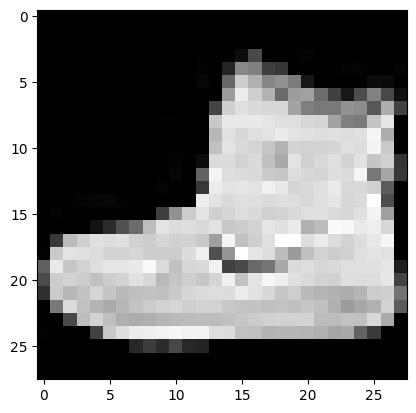

In [56]:
plt.imshow(image.squeeze(), cmap = "gray")

### set up loss fn and optimizer
training cnn on our own dataset



In [57]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_2.parameters(),
                            lr = 0.1)

### training and testing model 2 using training and testing functions

In [ ]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

#measure time
start_time_of_cnn_on_gpu = timer()

#train and test model
epochs = 5
for epoch in tqdm(range(epochs)):
  print(f"epoch: {epoch}")

  train_step(model=model_2,
             data_loader=train_dataloader,
             loss_fn=loss_fn,
             optimizer=optimizer,
             acc_fn=acc_fn,
             device=device)
  test_step(model=model_2,
            data_loader=test_dataloader,
            loss_fn=loss_fn,
            acc_fn=acc_fn,
            device=device)

end_train_of_cnn_on_gpu = timer()
total_train_time_model_2 = print_train_time(start=start_time_of_cnn_on_gpu,
                                            end=end_train_of_cnn_on_gpu,
                                            device=device)


  0%|          | 0/5 [00:00<?, ?it/s]

epoch: 0
train loss: 0.59518 | train acc: 78.38%
Test loss: 0.39531 | Test acc: 85.98%
epoch: 1
train loss: 0.36421 | train acc: 86.86%
Test loss: 0.38956 | Test acc: 86.13%
epoch: 2
train loss: 0.32472 | train acc: 88.31%
Test loss: 0.35000 | Test acc: 87.45%
epoch: 3
train loss: 0.30469 | train acc: 89.03%
Test loss: 0.31736 | Test acc: 88.53%
epoch: 4


In [77]:
model_2_results = eval_model(model=model_2,
                             data_loader=test_dataloader,
                             loss_fn=loss_fn,
                             acc_fn= acc_fn)
model_2_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.34219005703926086,
 'model_acc': 87.65974440894568}

In [78]:
model_1_results

{'model_name': 'FashionMNISTModelV1',
 'model_loss': 0.6555879712104797,
 'model_acc': 76.27795527156549}

In [79]:
model_0_results

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.46732279658317566,
 'model_acc': 83.55630990415335}

###8. compare results of models


In [80]:
import pandas as pd
compare_results = pd.DataFrame([model_0_results,
                                model_1_results,
                                model_2_results])
compare_results

,model_name,model_loss,model_acc
0,FashionMNISTModelV0,0.467323,83.556310
1,FashionMNISTModelV1,0.655588,76.277955
2,FashionMNISTModelV2,0.342190,87.659744


In [81]:
#add training time to result comparison
compare_results["training_time"] = [total_train_time_model_0,
                                    total_train_time_model_1,
                                    total_train_time_model_2]

compare_results

,model_name,model_loss,model_acc,training_time
0,FashionMNISTModelV0,0.467323,83.556310,54.631962
1,FashionMNISTModelV1,0.655588,76.277955,54.525856
2,FashionMNISTModelV2,0.342190,87.659744,298.358995


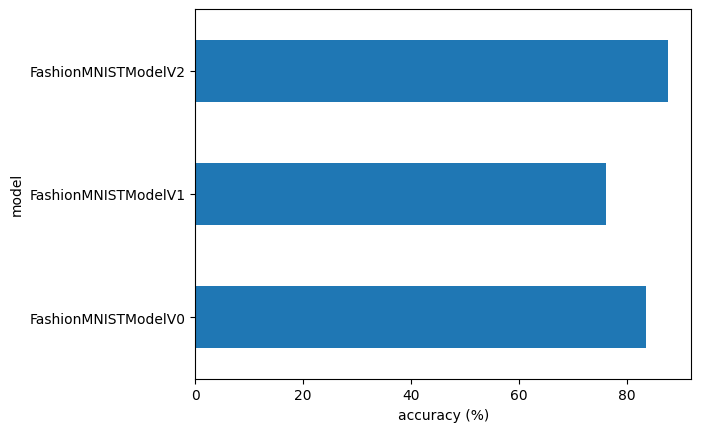

In [82]:
compare_results.set_index("model_name")["model_acc"].plot(kind="barh")
plt.xlabel("accuracy (%)")
plt.ylabel("model");


###9. make and evaluate random predictions with best model

In [83]:
def make_predictions(model: torch.nn.Module,
                     data:list,
                     device: torch.device = device):
  pred_probs = []
  model.to(device)
  model.eval()
  with torch.inference_mode():
    for sample in data:
      sample = torch.unsqueeze(sample, dim=0).to(device)

      pred_logit = model(sample)

      pred_prob = torch.softmax(pred_logit.squeeze(), dim=0)

      pred_probs.append(pred_prob.cpu())

  return torch.stack(pred_probs)

In [84]:
import random
#random.seed(42)
test_samples = []
test_labels = []
for sample, label in random.sample(list(test_data), k=9):
  test_samples.append(sample)
  test_labels.append(label)

#view the first sample image
test_samples[0].shape, len(test_samples), test_labels

(torch.Size([1, 28, 28]), 9, [6, 1, 6, 4, 0, 3, 6, 6, 9])

Text(0.5, 1.0, 'Shirt')

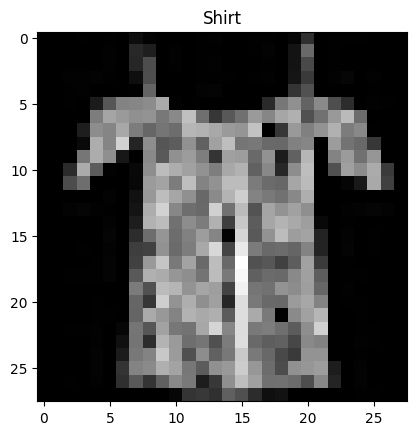

In [85]:
plt.imshow(test_samples[0].squeeze(), cmap="gray")
plt.title(class_names[test_labels[0]])

In [86]:
# make predictions
pred_probs = make_predictions(model=model_2,
                              data=test_samples)

pred_probs[:2]

tensor([[8.5404e-01, 6.6732e-06, 2.0812e-04, 7.1939e-04, 2.9078e-06, 9.0241e-06,
         1.4464e-01, 6.6563e-07, 3.7247e-04, 7.8243e-08],
        [7.2189e-04, 9.8861e-01, 1.5229e-05, 9.1187e-03, 3.7644e-04, 1.3039e-04,
         2.0774e-04, 2.1543e-05, 7.8946e-04, 9.2353e-06]])

In [87]:
#convert predictions probs to labels
pred_classes = pred_probs.argmax(dim=1)
pred_classes

tensor([0, 1, 6, 4, 0, 3, 6, 6, 9])

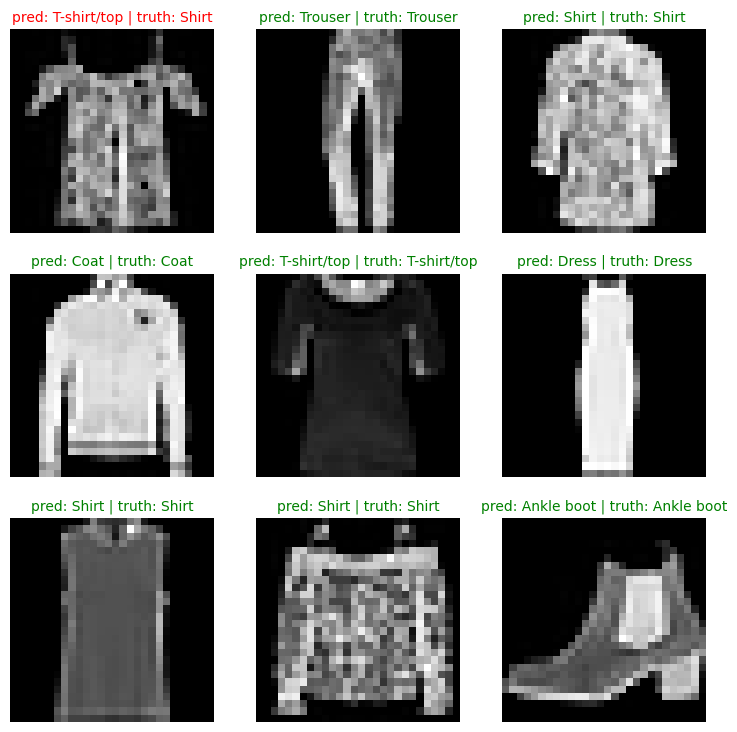

In [88]:
#plot predictions
plt.figure(figsize=(9,9))
nrows = 3
ncols = 3
for i, sample in enumerate(test_samples):
  #create subplot
  plt.subplot(nrows,ncols,i+1)

  #plot the target image
  plt.imshow(sample.squeeze(), cmap="gray")

  pred_label = class_names[pred_classes[i]]

  #create truth label
  truth_label = class_names[test_labels[i]]

  title_text = f"pred: {pred_label} | truth: {truth_label}"

  if pred_label==truth_label:
    plt.title(title_text, fontsize=10, c="g")

  else:
    plt.title(title_text, fontsize=10, c="r")

  plt.axis(False)

###10. making a confusion matrix for further prediction evaluation

a confusion matrix is a fantastic way to evaluate classification models visually
how:
1. make predictions with our trained model on the test dataset.
2. make a confusion matrix `torchmetrics.ConfusionMatrix`
3. plot the confusion matrix using `mlxtend.plotting.plot_confusion_matrix()`

In [89]:
#import tqdm.auto
from tqdm.auto import tqdm

#1. make predictions with trained model
y_preds = []
model_2.eval()
with torch.inference_mode():
  for X, y in tqdm(test_dataloader, desc="making predictions...."):
    X, y = X.to(device), y.to(device)

    #do the forward pass
    y_logits = model_2(X)
    #turn logits to labels
    y_pred = torch.softmax(y_logits.squeeze(), dim=0).argmax(dim=1)

    #put predictions on cpu to evaluate
    y_preds.append(y_pred.cpu())


  #concatenate list of predictions into tensor
  #print(y_preds)
  y_pred_tensor = torch.cat(y_preds)
  print(y_pred_tensor[:])

making predictions....:   0%|          | 0/313 [00:00<?, ?it/s]

tensor([2, 1, 5,  ..., 2, 5, 9])


In [90]:
len(y_pred_tensor)

10000

In [91]:
#see if required packages are installed, and if not, install them
try:
    import mlxtend
    print(f"mlxtend version: {mlxtend.__version__}")
    assert int(mlxtend.__version__.split(".")[1]) >= 19, "mlxtend version should be more than 19"
except ImportError:
    !pip install torchmetrics -U mlxtend
    import torchmetrics, mlxtend
    print("mlxtend is not installed. Please install it using: pip install mlxtend")


mlxtend version: 0.23.4


In [92]:
!pip install -q torchmetrics

In [93]:
import mlxtend
mlxtend.__version__

'0.23.4'

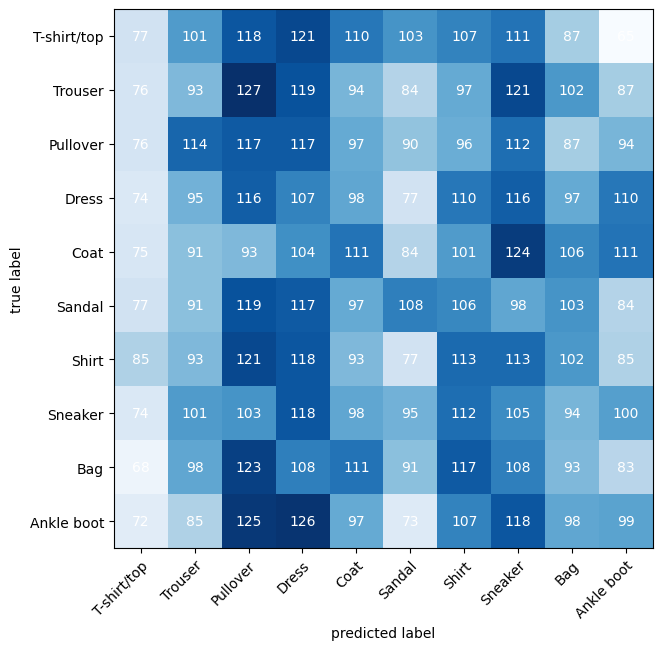

In [96]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

conf_mat = ConfusionMatrix(task = "MULTICLASS",
                           num_classes = len(class_names))
conf_mat_tensor = conf_mat(preds=y_pred_tensor,
                           target=test_data.targets)

fig, ax = plot_confusion_matrix(conf_mat = conf_mat_tensor.numpy(),
                                class_names = class_names,
                                figsize= (10,7))

##11. save and load best performing model


In [97]:
from pathlib import  Path

#create model directory path
model_path = Path("models")
model_path.mkdir(parents=True,
                 exist_ok=True)
#create model save
model_name = "pytorch_cv_model_2.pth"
model_save_path = model_path/model_name

#save the model state dict
print(f"saving model to: {model_save_path}")
torch.save(obj=model_2.state_dict(),
           f=model_save_path)

model_save_path

saving model to: models/pytorch_cv_model_2.pth


PosixPath('models/pytorch_cv_model_2.pth')

In [98]:
#create a new instance of model 2 from saved model
torch.manual_seed(42)
loaded_model_2 = FashionMNISTModelV2(input_shape=1,
                                     hidden_units=10,
                                     output_shape=len(class_names))

loaded_model_2.load_state_dict(torch.load(f=model_save_path))

loaded_model_2.to(device)

FashionMNISTModelV2(
  (convo_block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (convo_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [99]:
model_2_results

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.34219005703926086,
 'model_acc': 87.65974440894568}

In [100]:
#evaluate loaded model
torch.manual_seed(42)

loaded_model_2_results = eval_model(model=loaded_model_2,
                                    data_loader=test_dataloader,
                                    loss_fn=loss_fn,
                                    acc_fn=acc_fn)

loaded_model_2_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.34258463978767395,
 'model_acc': 87.64976038338658}

In [101]:
#check if model results are close
torch.isclose(torch.tensor(model_2_results['model_loss']),
              torch.tensor(loaded_model_2_results['model_loss']),
              atol=1e-03)

tensor(True)